In [41]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_train_data
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

In [86]:
# Load the data
data_path = os.path.join('data', 'meta.csv')
df = pd.read_csv(data_path)

print(df['Grid'].value_counts())

df = df[df.Grid == 1]
df = df[df.Season == 'Summer']
print(df.shape)
# Get random sample from train_data
df = df.sample(frac=5e-2)
print('Dataset size:', df.shape)

data, labels = load_train_data(df['Path'].values.tolist())
# data = data.reshape(data.shape[0], -1)
# labels = labels.reshape(labels.shape[0], -1)
print(data.shape, labels.shape)

Grid
1    880456
2    879374
Name: count, dtype: int64
(240826, 19)
Dataset size: (12041, 19)
(12041, 120, 120, 3) (12041, 120, 120)


In [110]:
# Load classes.csv
# classes_path = os.path.join('classes.csv')
classes_df = pd.read_csv('data/classes.csv', sep='\t')
classes_df = classes_df.set_index('ID')
print(classes_df.head(20))
print(classes_df.columns)
print(classes_df.shape)

                                         Class
ID                                            
1                      Continuous urban fabric
2                   Discontinuous urban fabric
3               Industrial or commercial units
4   Road and rail networks and associated land
5                                   Port areas
6                                     Airports
7                     Mineral extraction sites
8                                   Dump sites
9                           Construction sites
10                           Green urban areas
11                Sport and leisure facilities
12                   Non-irrigated arable land
13                                   Vineyards
14           Fruit trees and berry plantations
15                                    Pastures
16                         Broad-leaved forest
17                           Coniferous forest
18                                Mixed forest
19                          Natural grasslands
20           

In [111]:
# Define a color name available in matplotlib to each of 33 classes
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan',
 'black', 'yellow', 'magenta', 'lime', 'teal', 'indigo', 'maroon', 'navy', 'peru', 'gold',
 'darkorange', 'darkgreen', 'darkred', 'darkblue', 'darkmagenta', 'darkcyan', 'darkgray',
 'darkolivegreen', 'cyan', 'darkslategray', 'darkgoldenrod', 'darkseagreen', 'darkslateblue']

print(classes_df.head(35))
print(len(colors))
# print(np.unique(classes_df['Color']).shape)
classes_df['Color'] = colors
print(classes_df.head(35))

                                         Class
ID                                            
1                      Continuous urban fabric
2                   Discontinuous urban fabric
3               Industrial or commercial units
4   Road and rail networks and associated land
5                                   Port areas
6                                     Airports
7                     Mineral extraction sites
8                                   Dump sites
9                           Construction sites
10                           Green urban areas
11                Sport and leisure facilities
12                   Non-irrigated arable land
13                                   Vineyards
14           Fruit trees and berry plantations
15                                    Pastures
16                         Broad-leaved forest
17                           Coniferous forest
18                                Mixed forest
19                          Natural grasslands
20           

In [112]:
classes_groups_df = pd.read_csv('data/class_groups.csv')
classes_df = pd.merge(classes_df.reset_index(), classes_groups_df, on='Class')
print(classes_df.head(20))
print(np.unique(classes_df['Group']).shape)

    ID                                       Class    Color  \
0    1                     Continuous urban fabric      red   
1    2                  Discontinuous urban fabric     blue   
2    3              Industrial or commercial units    green   
3    4  Road and rail networks and associated land   purple   
4    5                                  Port areas   orange   
5    6                                    Airports    brown   
6    7                    Mineral extraction sites     pink   
7    8                                  Dump sites     gray   
8    9                          Construction sites    olive   
9   10                           Green urban areas     cyan   
10  11                Sport and leisure facilities    black   
11  12                   Non-irrigated arable land   yellow   
12  13                                   Vineyards  magenta   
13  14           Fruit trees and berry plantations     lime   
14  15                                    Pastures     

In [113]:
print(classes_df.head(35))

    ID                                       Class           Color  \
0    1                     Continuous urban fabric             red   
1    2                  Discontinuous urban fabric            blue   
2    3              Industrial or commercial units           green   
3    4  Road and rail networks and associated land          purple   
4    5                                  Port areas          orange   
5    6                                    Airports           brown   
6    7                    Mineral extraction sites            pink   
7    8                                  Dump sites            gray   
8    9                          Construction sites           olive   
9   10                           Green urban areas            cyan   
10  11                Sport and leisure facilities           black   
11  12                   Non-irrigated arable land          yellow   
12  13                                   Vineyards         magenta   
13  14           Fru

In [ ]:
# Group labels
group_labels = classes_df['Group'].values
print(group_labels.shape)
print(np.unique(group_labels).shape)


In [6]:
def normalize_to_255(image):
    normalized = (image - np.min(image)) / (np.max(image) - np.min(image))
    return (normalized * 255).astype(np.uint8)

12 in labels


AttributeError: 'Series' object has no attribute 'remove_duplicates'

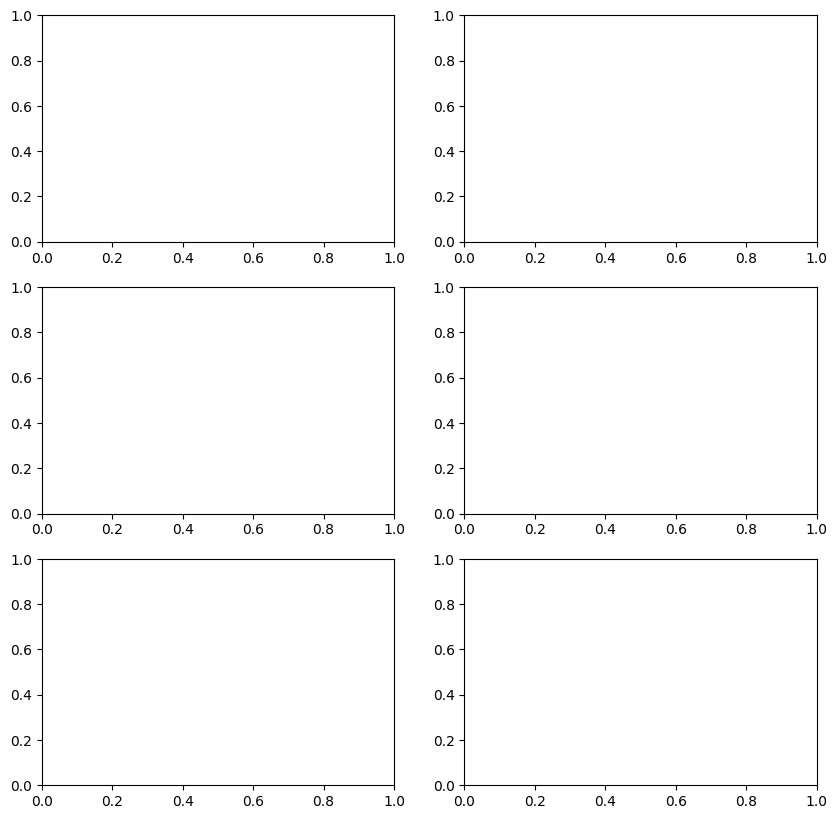

In [ ]:
# Plot 3 rgb image and segmentation labels side by side
sample_size = 3
# Obtenha índices aleatórios
indices = np.random.choice(data.shape[0], sample_size, replace=False)
# Extraia a amostra dos arrays
sampled_data = data[indices]
sampled_labels = labels[indices]

if 12 in list(sampled_labels.reshape(-1)):
    print('12 in labels')
else:
    print('12 not in labels')

fig, axs = plt.subplots(sample_size, 2, figsize=(10, 10))
# Convert class colors to a colormap
# colors = set(classes_df['Color_Group'].values)
colors = classes_df['Color_Group']
print(colors)
cmap = mcolors.ListedColormap(colors)
bounds = np.arange(len(colors) + 1)
norm = mcolors.BoundaryNorm(bounds, cmap.N)


for i in range(sample_size):
    # Index goes from 0 - 32 and labels go from 1 - 33
    present_indexes = np.unique(sampled_labels[i])
    print(present_indexes.shape)
    # present_labels = classes_df['Group', 'ID'].isin(present_indexes).values
    present_labels = classes_df[present_indexes].values
    print(f'Image: {i} - Present labels: {present_labels} \n')
    
    axs[i, 0].imshow(normalize_to_255(sampled_data[i]))
    axs[i, 0].set_title('RGB Image')
    
    axs[i, 1].imshow(sampled_labels[i], cmap=cmap, norm=norm)
    axs[i, 1].set_title(f"Segmentation Mask {i+1}")

group_classes = list(set(classes_df['Group'].values))
# legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f'{classes_df.loc[i, 'Class']}') for i in range(len(colors))]
# legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f"{classes_df.loc[i+1, 'Group']}") for i in range(len(colors))]
legend_elements = [plt.Line2D([0], [0], color=cmap(i), lw=4, label=f"{group_classes[i]}") for i in range(len(colors))]
fig.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=8, fontsize='small')
plt.show()